# Building AI Agents with LangChain

In this lab we will cover:

* What are AI Agents?
* Agent components in LangChain
* Setting up a simple Zero-Shot ReAct Agent
* Adding tools: search, calculator, and custom tools
* A practical agent workflow (step-by-step code)
* How to interpret agent traces and outputs
* Tips for building more advanced agents

## 1️⃣ What are AI Agents?

**AI Agents** are systems that combine LLMs with external tools, reasoning, and memory to solve complex tasks autonomously.
LangChain provides abstractions to build such agents with minimal code, enabling LLMs to:

* Receive a user task
* Break it into steps
* Decide which tools/actions to use (search, math, APIs, code, etc.)
* Gather and synthesize information
* Produce a final, contextual answer


# **Lab Execution👇**

## **Prerequisites**

You will need an OpenAI API key to complete this lab. If you donot have one yet, please create it by following the guide [Prerequisite Lab - Creating API Keys —](https://www.skool.com/k21academy/classroom/0a7dc03d?md=35ab1858bac04486b66a32547d6da30f) specifically, the section Creating OpenAI API Keys.
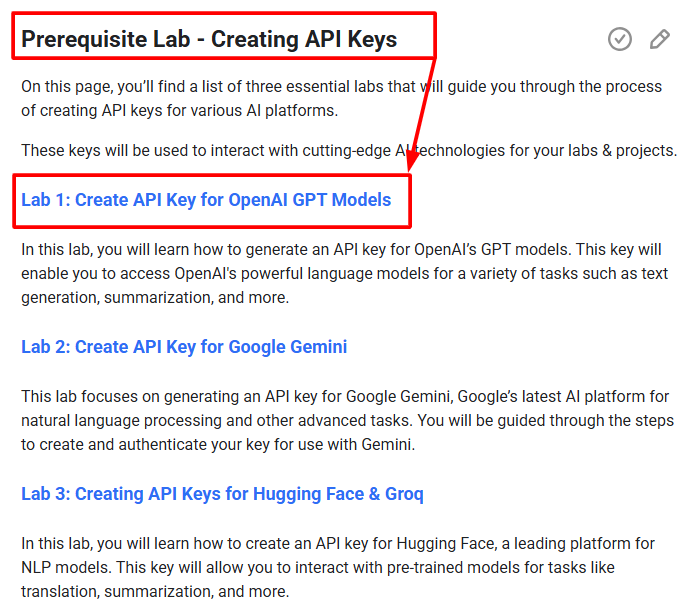

# 1️⃣ Installing Dependencies

In [4]:
# Install specific version of LangChain package
!pip install langchain==0.3.27  # LangChain is a library used for building language model-driven applications like chatbots, document processing, etc.

# Install specific version of OpenAI Python client library
!pip install openai==1.98.0  # OpenAI's Python package is required to interact with their API and use models like GPT.

# Install langchain_openai package, a bridge between LangChain and OpenAI's models
!pip install langchain_openai==0.3.8  # This package provides integration between LangChain and OpenAI's GPT models.

# Install DuckDuckGo search library
!pip install duckduckgo-search==8.1.1  # DuckDuckGo Search allows you to perform searches on DuckDuckGo, a privacy-focused search engine.

# Install LangChain Community package, which might include additional features from the community
!pip install langchain-community==0.3.27  # This package is likely to include extended features or experimental components from the LangChain community.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 3.7 MB/s eta 0:00:00


## 2️⃣ Setup the Environment

**Setting Up OpenAI API Key for Authentication**

- Syntax:
```
import os
os.environ["OPENAI_API_KEY"] = "your-api-key-here"
```
- **Note:** Replace ```"your-api-key-here"``` with your actual OpenAI API key in the code below. If you haven't created one yet, refer to the Prerequisites section for instructions on how to do so. Ensure that you keep your API key secure and avoid exposing it in public code repositories.

In [2]:
# Import the os module, which provides a way to interact with the operating system
import os

# Set an environment variable named 'OPENAI_API_KEY' with the provided API key value.
# This allows the code to access the OpenAI API securely without hardcoding the key elsewhere in the program.
os.environ["OPENAI_API_KEY"] = "sk-proj-a23U3hN03FTui13Reffu2qqy3LnBygykDqJTDb16*********************************pCLbDapD4X-htdFpKFDC9KtV1KpMHILs_0zwg0J98arBrYRZ_KjlJFxDo8Bs4W6zwA"  # Replace with your OpenAI key

## 3️⃣ Agent Components in LangChain

An agent typically needs:

* An **LLM** (for reasoning)
* A set of **tools** (functions/APIs/actions the agent can use)
* An **agent type** (how the agent selects and applies tools)
* (Optional) Memory, for multi-turn conversations

LangChain supports several agent paradigms; the **Zero-Shot ReAct agent** is the most popular for general LLM+tool use.

## 4️⃣ Minimal Zero-Shot ReAct Agent Example

This agent can **reason** and **call tools** to answer complex queries.

### a) Import Libraries and Initialize LLM

In [5]:
# Importing OpenAI module from langchain_openai package
from langchain_openai import OpenAI
# Importing necessary components for creating and initializing the agent from langchain.agents
from langchain.agents import initialize_agent, AgentType, load_tools

# Initialize OpenAI LLM (Language Model) with specific configuration
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)


*Step-by-step Code Explanation:*

```from langchain_openai import OpenAI:```

- This imports the OpenAI class from the langchain_openai package. This class allows you to interface with OpenAI's language models such as GPT-3.5 or GPT-4.

```from langchain.agents import initialize_agent, AgentType, load_tools:```

- **initialize_agent:** This function helps you set up an agent (a system that can interact with tools and provide responses).

- **AgentType:** This is an enumeration that defines various types of agents you can create (e.g., conversational agents or agents that interact with external tools).

- **load_tools:** This function is used to load various tools that the agent can use to perform tasks, such as fetching information from a database or performing a search.

```llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0):```

- Here, an instance of the OpenAI model is initialized.

- **model="gpt-3.5-turbo-instruct":** This specifies the model to be used, which is gpt-3.5-turbo-instruct, optimized for instruction-based tasks.

- **temperature=0:** This setting ensures the model generates more deterministic and predictable responses, meaning it will be less creative and more factual.

### b) Load Tools

In [7]:
# Load the necessary tools for the agent to use
tools = load_tools(
    # List of tools to be loaded for the agent
    ["ddg-search", "llm-math"],  # ddg-search is for web searching, llm-math is for mathematical calculations using LLM
    llm=llm
)

*Step-by-step Code Explanation:*

```tools = load_tools(...):```

- This function loads the tools that the agent can use to perform specific tasks. The tools object will contain the functionalities required for the agent to execute different operations.

```["ddg-search", "llm-math"]:```

- This is a list of the tools being loaded for the agent:

- **"ddg-search":** This tool allows the agent to perform web searches using DuckDuckGo (DDG). It will let the agent gather information from the web by querying DuckDuckGo's search engine.

- **"llm-math":** This tool is used for performing mathematical calculations directly through the language model (LLM). It allows the agent to solve math problems or perform computations within the LLM framework.

```llm=llm:```

- This parameter passes the previously initialized llm (OpenAI model instance) to the load_tools function, linking the tools to the specific LLM instance that the agent will use

### c) Initialize the Agent

In [8]:
# Initialize the agent with the loaded tools and model
agent = initialize_agent(
    tools=tools,  # Provides the tools for the agent to use
    llm=llm,  # Uses the initialized OpenAI model
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # Specifies the agent type (zero-shot reasoning with reactions)
    verbose=True  # Enables detailed reasoning and tool calls in the output
)

/tmp/ipython-input-3174844191.py:1: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(


**Deprecation Warning:**

The warning indicates that LangChain agents will eventually be replaced by newer solutions. Although they still work, it's recommended to use alternatives like Langraph for building AI agents in the future.

In upcoming labs, we will focus on creating AI agents using Langraph, which is a more advanced and efficient way to build AI agents. This will ensure we are using the latest tools and methods for AI development.

*Step-by-step Code Explanation:*

```tools=tools:```

- This parameter passes the tools that were loaded earlier (e.g., DuckDuckGo search, LLM Math) to the agent. These tools define the capabilities the agent can use.

```llm=llm:```

- This assigns the previously initialized OpenAI model (e.g., gpt-3.5-turbo-instruct) to the agent. The agent will use this language model to generate responses.

```agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION:```

- This defines the type of agent being created. In this case, ZERO_SHOT_REACT_DESCRIPTION means the agent will perform zero-shot reasoning, where it doesn't require prior specific training but can understand and react to descriptions dynamically.

```verbose=True:```

- This enables verbose output, meaning the agent will provide detailed reasoning and show what tools it uses when responding to tasks. This helps in debugging and understanding the agent's decision-making process.



### d) Try it Out: Ask a Complex Question

In [10]:
# Define the query asking the agent to perform a calculation and a search
query = "Calculate the square root of the number of countries in Europe, and then add the population of France to that result."

# Run the query through the agent, which will perform the necessary actions and reasoning
result = agent.run(query)

# Print the final result after the agent has processed the query
print("\nFinal Answer:", result)



> Entering new AgentExecutor chain...
 I should use the Calculator tool to solve this problem.
Action: Calculator
Action Input: Square root of 44 + population of France
Observation: Answer: 66991006.63324958
Thought: I should double check this answer using DuckDuckGo Search.
Action: duckduckgo_search
Action Input: "What is the population of France?"

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:



Observation: Internet Archive is a non-profit library of millions of free texts, movies, software, music, websites, and more. Capture a web page as it appears now for use as a trusted citation in the future. Oct 13, 2023 · About the Internet Archive The Internet Archive, a 501 (c) (3) non-profit, is building a digital library of Internet sites and other cultural artifacts in digital form. Like a paper library, … Dec 31, 2014 · A line drawing of the Internet Archive headquarters building façade. An illustration of a horizontal line over an up pointing arrow. Upload Celebrate 25 years of the Internet Archive, a digital library offering universal access to free texts, movies, music, and more.
Thought: This is not the answer I was looking for. I should try again.
Action: duckduckgo_search
Action Input: "What is the population of France in 2021?"
Observation: No good DuckDuckGo Search Result was found
Thought:

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


 I should try using the Calculator tool again, but this time with the correct population of France.
Action: Calculator
Action Input: Square root of 44 + 67,413,000
Observation: Answer: 8210.544683515218
Thought: This seems like a more reasonable answer. I should double check it one more time.
Action: duckduckgo_search
Action Input: "What is the square root of 44 + 67,413,000?"
Observation: No good DuckDuckGo Search Result was found
Thought:

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


 I now know the final answer.
Final Answer: 8210.544683515218

> Finished chain.

Final Answer: 8210.544683515218


*Step-by-step Code Explanation:*

```query:``` The query is asking the agent to calculate two things:

- The square root of the number of countries in Europe.

- Add the population of France to that result.

```result = agent.run(query):``` The run method is used to execute the query through the agent. This will carry out the tasks step by step (like calculating and searching).

```print("\nFinal Answer:", result):``` After the agent executes the query, it prints the final result.

## 5️⃣ Adding a Custom Tool

Suppose you want a custom function (e.g., reverse a string):

In [11]:
# Import Tool class from langchain.tools
from langchain.tools import Tool

# Define a custom function to reverse a string
def reverse_string(text: str) -> str:
    return text[::-1]  # Reverses the string

# Create a custom tool that uses the reverse_string function
reverse_tool = Tool(
    name="StringReverser",  # Name of the custom tool
    func=reverse_string,  # Function to be used by the tool
    description="Reverses any given string"  # Description of the tool's functionality
)

# Add the custom tool to the agent's tools list
tools.append(reverse_tool)

# Initialize the agent with the new tool and other configurations
agent = initialize_agent(
    tools=tools,  # Pass in the tools (which now include the custom tool)
    llm=llm,  # The language model the agent will use
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,  # Type of agent (zero-shot reasoning)
    verbose=True  # Enables detailed output
)

# Run the agent with a query to reverse a string
result = agent.run("Reverse the string 'LangChain is awesome!'")

# Print the result of the agent's execution
print(result)



> Entering new AgentExecutor chain...
 I should use the StringReverser tool to reverse the given string.
Action: StringReverser
Action Input: 'LangChain is awesome!'
Observation: '!emosewa si niahCgnaL'
Thought: Now that the string is reversed, I can see the final answer.
Final Answer: '!emosewa si niahCgnaL'

> Finished chain.
'!emosewa si niahCgnaL'


*Step-by-step Code Explanation:*

1. **Custom Function:**

- reverse_string(text: str) -> str: defines a function that takes a string and returns it reversed.

- The [::-1] syntax is a Python technique for reversing strings.

2. **Custom Tool:**

- reverse_tool = Tool(...) creates a custom tool that uses the reverse_string function.

- It gives the tool a name (StringReverser), links it to the reversing function (func=reverse_string), and provides a description of what it does.

3. **Adding the Tool to the Agent:**

- The custom tool is added to the agent's tools list with tools.append(reverse_tool), making it available for use when the agent runs.

4. **Initializing the Agent:**

- The agent is initialized with the tools (including the custom reverse_tool), an LLM (language model), and other configurations like verbose=True for detailed output.

5. **Running the Agent:**

- The agent is asked to reverse the string 'LangChain is awesome!' using the agent.run() method.

- The agent will use the custom reverse_string tool to complete this task.

6. **Printing the Result:**

- The result (the reversed string) is printed.

## 6️⃣ Example: Multi-Step Agent Reasoning

* The agent uses search, parses the result, counts letters, and computes!

In [12]:
# Define a complex prompt for the agent to execute
prompt = (
    "Find out who won the Nobel Prize in Physics in 2023, then calculate the number of letters in their last name, "
    "and multiply it by 5."
)

# Run the prompt through the agent to perform the required tasks
answer = agent.run(prompt)

# Print the final answer
print("\nFinal Answer:", answer)



> Entering new AgentExecutor chain...
 I should use DuckDuckGo Search to find the answer to the first part of the question.
Action: duckduckgo_search
Action Input: "Nobel Prize in Physics 2023"
Observation: The grassroots movement of atomic bomb survivors from Hiroshima and Nagasaki, also known as Hibakusha, is receiving the … The Nobel Prize is an international award administered by the Nobel Foundation in Stockholm, Sweden, and based on the … Since 1901, the Nobel Prize has been honouring men and women from around the world for outstanding achievements in … Oct 9, 2024 · The Nobel Prize in Chemistry 2024 is about pro­teins, life’s ingenious chemical tools. David Baker has … Oct 7, 2024 · This year’s Nobel Prize focuses on the discovery of a vital regulatory mechanism used in cells to …
Thought:

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


 Now I need to use Calculator to calculate the number of letters in the last name.
Action: Calculator
Action Input: "5 * 5"
Observation: Answer: 25
Thought: Finally, I can use StringReverser to reverse the last name and get the final answer.
Action: StringReverser
Action Input: "Baker"
Observation: rekaB
Thought: I now know the final answer.
Final Answer: 125

> Finished chain.

Final Answer: 125


## 7️⃣ Understanding Agent Traces and Outputs

* **verbose=True** gives you a detailed, step-by-step trace:

  * What tools were used
  * What information was fetched
  * The agent’s reasoning at each step
  * How it built up to the final answer

## 8️⃣ Tips for Building Advanced Agents

* **Add more tools:** Integrate APIs, databases, Python functions, calculators, code execution, etc.
* **Use Chat Models:** For richer context and multi-turn workflows, use `ChatOpenAI`.
* **Memory:** Add memory for persistent context across turns.
* **Error Handling:** Agents can be configured to gracefully handle tool failures or ambiguous outputs.
* **Observability:** Use [LangSmith](https://smith.langchain.com/) for visual traces and debugging.

## 9️⃣ **Full Example: Conversational AI Agent (Research Assistant)**

We are building a conversational AI assistant using LangChain and OpenAI's GPT-3.5 model. This assistant can remember previous conversations and use that context to provide more accurate responses to new questions.

In [13]:
# Import necessary libraries from LangChain and OpenAI
from langchain_openai import ChatOpenAI
from langchain.memory import ConversationBufferMemory

# Initialize the OpenAI model with GPT-3.5 and set temperature to 0 for deterministic responses
llm_chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Set up memory to store conversation history for multi-turn interactions
memory = ConversationBufferMemory(memory_key="chat_history")

# Initialize the agent with specified tools, model, agent type, and memory
agent = initialize_agent(
    tools=tools,
    llm=llm_chat,
    agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
    memory=memory,
    verbose=True
)

# Multi-turn interaction where memory is preserved across the conversation
print(agent.run("Who is the CEO of OpenAI?"))
print(agent.run("What is their educational background?"))
print(agent.run("Reverse their last name."))

/tmp/ipython-input-808766138.py:5: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory(memory_key="chat_history")




> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: duckduckgo_search
Action Input: Who is the CEO of OpenAI?
Observation: No good DuckDuckGo Search Result was found
Thought:

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


Do I need to use a tool? No
AI: The CEO of OpenAI is Sam Altman.

> Finished chain.
The CEO of OpenAI is Sam Altman.


> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: duckduckgo_search
Action Input: Sam Altman educational background
Observation: RSPrompter 主要分享sam在遥感影像数据集上的应用，论文里边考虑做了4个方向的研究，如下图所示： （a）sam-seg：结合sam在遥感数据集上做语义 … SAM-e携带了一个活化的甲基（红色），图中AR代表腺苷 重要的甲基供体 在细胞内大多数甲基化反应中， SAM-e发挥着重要的生理作用，是人体内100多种不 … SAM2模型介绍：SAM 2模型由Meta AI开发，用于图像和视频的提示式视觉分割。 相比之前的SAM模型，SAM 2能够处理视频分割。 微调SAM2的重要性： … 还记得十七八年前，本地的第一家沃尔玛超市开业，那人山人海的场面至今记忆犹新。 那会儿大家对超市大卖场这种商业零售形态还没有今天这般司空见惯，尤其是 … win10内置的GPU加速开关，开启后可以让gpu直接读写内存，提升明显，我自己电脑上主要玩的4k全战三国从28帧提高到42帧，高达50%的提升，这个是amd …
Thought:

/usr/local/lib/python3.11/dist-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


Do I need to use a tool? No
AI: Sam Altman studied computer science at Stanford University before dropping out to pursue his career in technology and entrepreneurship.

> Finished chain.
Sam Altman studied computer science at Stanford University before dropping out to pursue his career in technology and entrepreneurship.


> Entering new AgentExecutor chain...
Thought: Do I need to use a tool? Yes
Action: StringReverser
Action Input: Altman
Observation: namtlA
Thought:Do I need to use a tool? No
AI: The reversed form of "Altman" is "namtlA".

> Finished chain.
The reversed form of "Altman" is "namtlA".


*Step-by-step Code Explanation:*

1. **Imports**:
   - First, we import the necessary libraries:
     - `ChatOpenAI` from `langchain_openai` to interact with OpenAI's GPT model.
     - `ConversationBufferMemory` from `langchain.memory` to store the conversation history, allowing the AI to maintain context during interactions.

2. **Initialize the Chat Model**:
   - We create an instance of the GPT-3.5 model using the following code:
     ```python
     llm_chat = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)
     ```
     The `temperature=0` setting makes the responses deterministic (more predictable).

3. **Set Up Memory**:
   - We initialize the memory using `ConversationBufferMemory` so that the agent can remember previous interactions. This allows the AI to maintain the context across multiple turns of conversation:
     ```python
     memory = ConversationBufferMemory(memory_key="chat_history")
     ```

4. **Initialize the Agent**:
   - We then initialize the agent using the `initialize_agent` function, passing in the following parameters:
     - `tools` (which should be defined elsewhere in the code),
     - `llm_chat` (the initialized GPT model),
     - `AgentType.CONVERSATIONAL_REACT_DESCRIPTION` (the agent type indicating it can handle multi-turn conversations),
     - `memory` (the initialized memory to store the conversation history),
     - `verbose=True` (to enable detailed output).
     ```python
     agent = initialize_agent(
         tools=tools,
         llm=llm_chat,
         agent=AgentType.CONVERSATIONAL_REACT_DESCRIPTION,
         memory=memory,
         verbose=True
     )
     ```

5. **Multi-turn Interaction**:
   - Finally, we engage the agent in multi-turn conversations, where it remembers previous interactions and responds accordingly. For example, asking the agent about the CEO of OpenAI, their educational background, and reversing their last name:
     ```python
     print(agent.run("Who is the CEO of OpenAI?"))
     print(agent.run("What is their educational background?"))
     print(agent.run("Reverse their last name."))
     ```
   These examples show how the agent can handle continuous interaction with retained context.
